<a href="https://colab.research.google.com/github/lgovindnayak/Assignment/blob/main/Mini_Project_SmartKnower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

Displaying One Image

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 250 250]
  [255 250 250]
  [255 250 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 250 250]
  [255 250 250]
  [255 250 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 250 250]
  [255 250 250]
  [255 250 250]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 252 248]
  [253 252 248]
  [253 252 248]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 252 248]
  [253 252 248]
  [253 252 248]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 252 248]
  [253 252 248]
  [253 252 248]]]


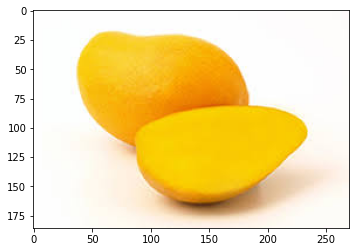

In [ ]:
path = '/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Fruits/fruit1.jpg'
img = plt.imread(path)   # reading the image
plt.imshow(img)    # showing the image
print(img)

Displaying all Images by Iterating the loops

/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Bikes
bike1.jpg


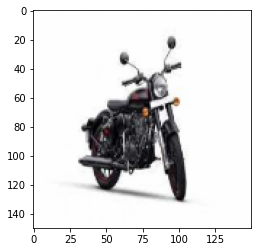

bike2.jpg


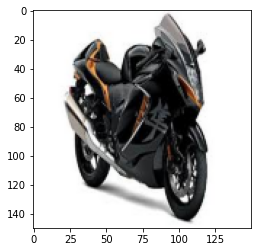

bike3.jpg


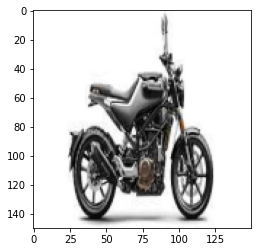

bike4.jpg


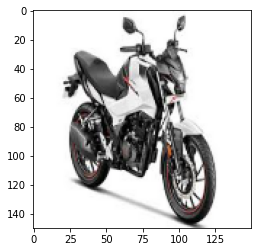

bike5.jpg


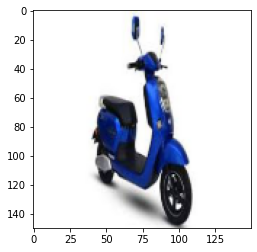

bike6.jpg


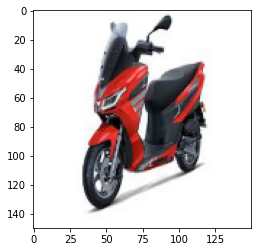

/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Cars
car1.jpg


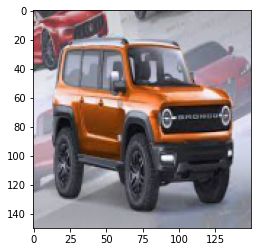

car2.jpg


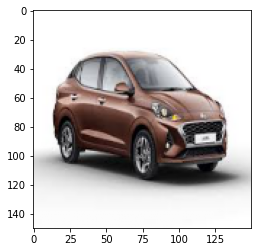

car3.jpg


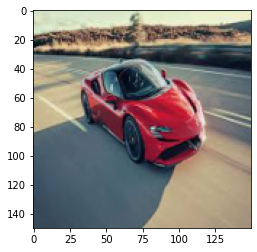

car4.jpg


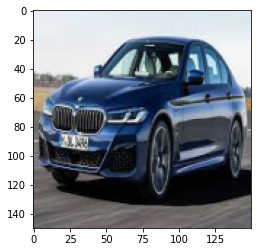

car5.jpg


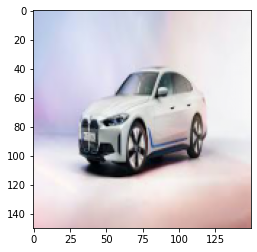

car6.jpg


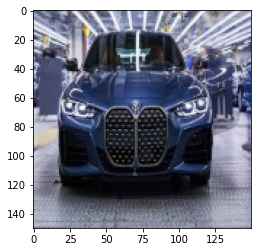

/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Fruits
fruit1.jpg


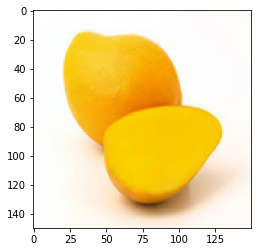

fruit2.jpg


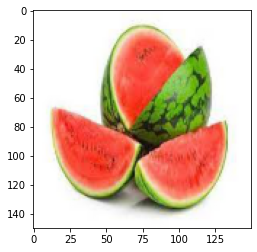

fruit3.jpg


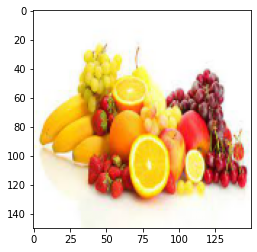

fruit4.jpg


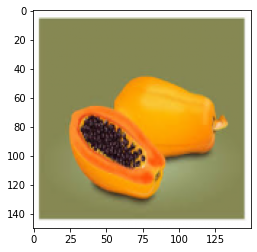

fruit5.jpg


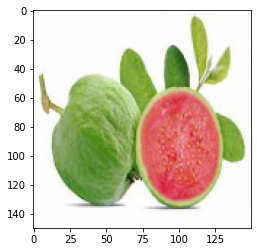

fruit6.jpg


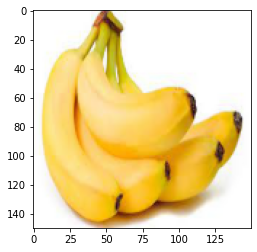

/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Hills
hills1.jpg


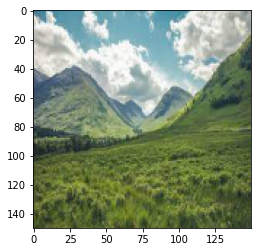

hills2.jpg


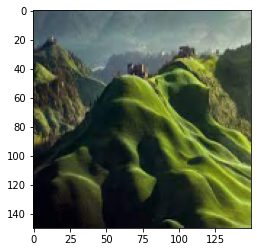

hills3.jpg


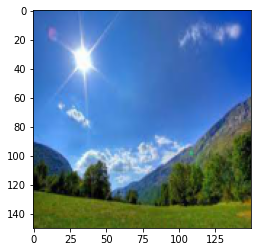

hills4.jpg


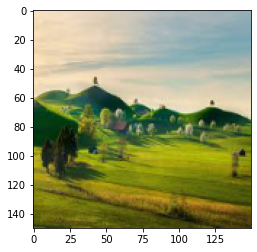

hills5.jpg


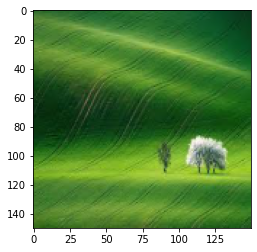

hills6.jpg


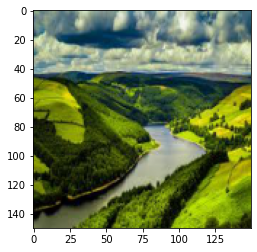

/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Houses
house1.jpg


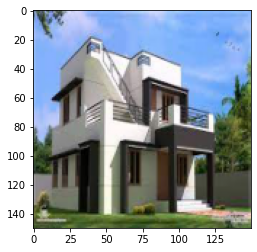

house2.jpg


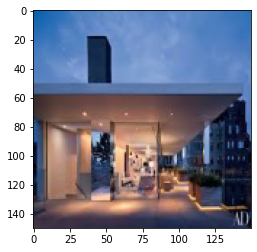

house3.jpg


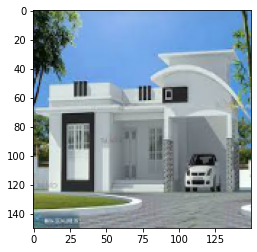

house4.jpg


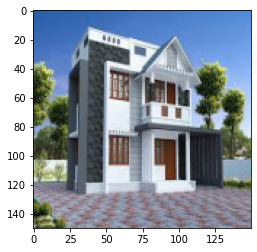

house5.jpg


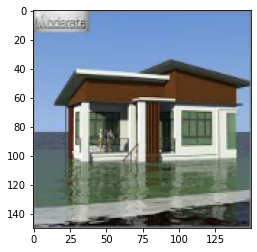

house6.jpg


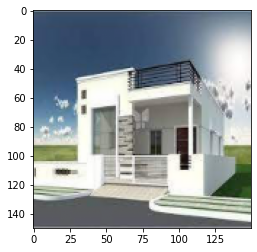

/content/drive/MyDrive/Smartknowerpro/Mini Project/Images/Phones
phone2.jpg


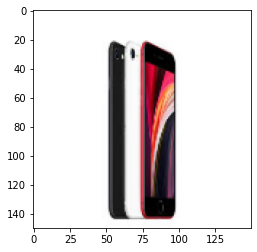

phone3.jpg


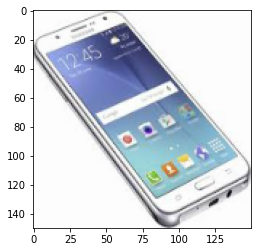

phone4.jpg


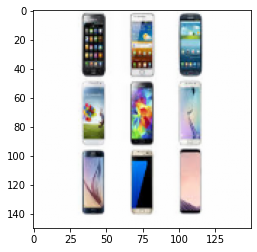

phone5.jpg


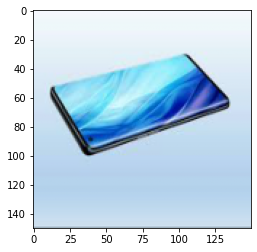

phone6.jpg


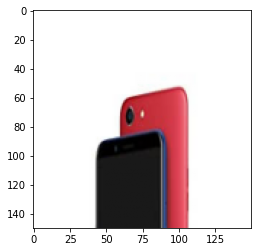

phone7.jpg


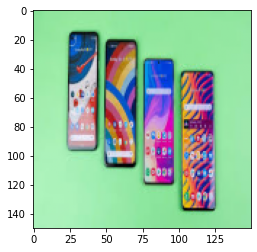

In [ ]:
ddir = '/content/drive/MyDrive/Smartknowerpro/Mini Project/Images'
categories = ['Bikes','Cars','Fruits','Hills','Houses','Phones']
target = []
flat_data = []

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(ddir,i)
  print(path)

  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3))
    flat_data.append(np.ndarray.flatten(img_resize))   # makes all pictures in same pixels like same height,length and width
    target.append(class_num)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
target = np.array(target) 

# below output will print all imgaes with their paths.
# and all images will resize to same size

In [ ]:
print(flat_data)

[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.96839216 0.97992157 0.99976471 ... 0.62423529 0.69482353 0.75019608]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.5254902  0.87843137 0.58823529 ... 0.57647059 0.88627451 0.65098039]]


In [ ]:
flat_data.shape

(36, 67500)

In [ ]:
len(flat_data[0])
# 150*150*3 = 67500 output will come

67500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5])

<BarContainer object of 6 artists>

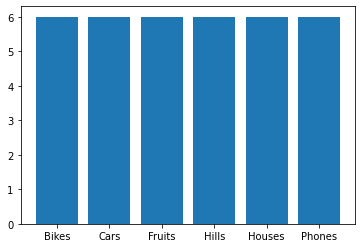

In [ ]:
unique, count = np.unique(target,return_counts=True)
plt.bar(categories,count)

Spliting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=17)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}

]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# checking the best parameters
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([4, 3, 3, 1, 1, 5, 4, 1, 3, 4, 0])

In [ ]:

y_test # original values

array([4, 3, 3, 5, 1, 5, 4, 1, 3, 4, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_pred,y_test)

# last accuracy for this model is 90% , it's well and good

0.9090909090909091

In [ ]:
confusion_matrix(y_pred,y_test)

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 1],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1

    accuracy                           0.91        11
   macro avg       0.90      0.93      0.89        11
weighted avg       0.95      0.91      0.92        11



Testing a brand new image

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSL8gPTDx1AzoiY76I9HqVcDeH1xeorU7DkPw&usqp=CAU
(213, 237, 3)
PREDICTED OUT IS : Phones


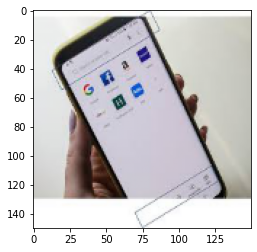

In [ ]:
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)

y_out = clf.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUT IS : {y_out}')

Enter your URLhttps://pbs.twimg.com/media/EbqQxYmXsAIr9us.jpg
(900, 1200, 3)
PREDICTED OUT IS : Hills


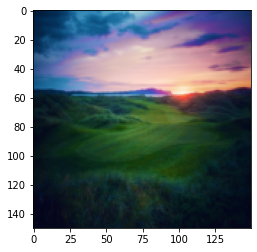

In [ ]:
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)

y_out = clf.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUT IS : {y_out}')

In [ ]:
#          --------------   Thank You   ----------